<a href="https://colab.research.google.com/github/varshakhare/leapfrog/blob/main/Project_Machinelearning_Personalloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [23]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score)

import warnings
warnings.filterwarnings("ignore")  # ignore warnings

%matplotlib inline
sns.set()

In [24]:
Loan = pd.read_csv("/Loan_Modelling.csv")   ##  Complete the code to read the data

In [25]:
#Data Overview
data = Loan.copy()

In [26]:
data.head() ##  Complete the code to view top 5 rows of the data


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
data.tail() ##  Complete the code to view last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [16]:
#Understand the shape of the dataset
df.shape()

NameError: name 'df' is not defined

In [18]:
#undestand the shape of dataset
data.shape

(5000, 14)

In [20]:
###  Complete the code to view the datatypes of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [24]:
data.describe().T ## Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [31]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [47]:
data.drop(["Age"], axis=1)

,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,49,91,4,1.6,1,0,0,1,0,0,0
1,19,34,90,3,1.5,1,0,0,1,0,0,0
2,15,11,94,1,1.0,1,0,0,0,0,0,0
3,9,100,94,1,2.7,2,0,0,0,0,0,0
4,8,45,91,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,40,92,1,1.9,3,0,0,0,0,1,0
4996,4,15,92,4,0.4,1,85,0,0,0,1,0
4997,39,24,93,2,0.3,3,0,0,0,0,0,0
4998,40,49,90,3,0.5,2,0,0,0,0,1,0


In [ ]:
#Data Processing

In [35]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [36]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [37]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [38]:
data["Education"].unique()

array([1, 2, 3])

In [ ]:
#Feature Engineering

In [39]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [40]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")


Number of unique values if we take first two digits of ZIPCode:  7


In [41]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
#Exploratory Data Analysis (EDA)
#Univariate Analysis

In [42]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [43]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#Observations on Age

In [ ]:
histogram_boxplot(data, "age")

In [ ]:
#Observations on Experience

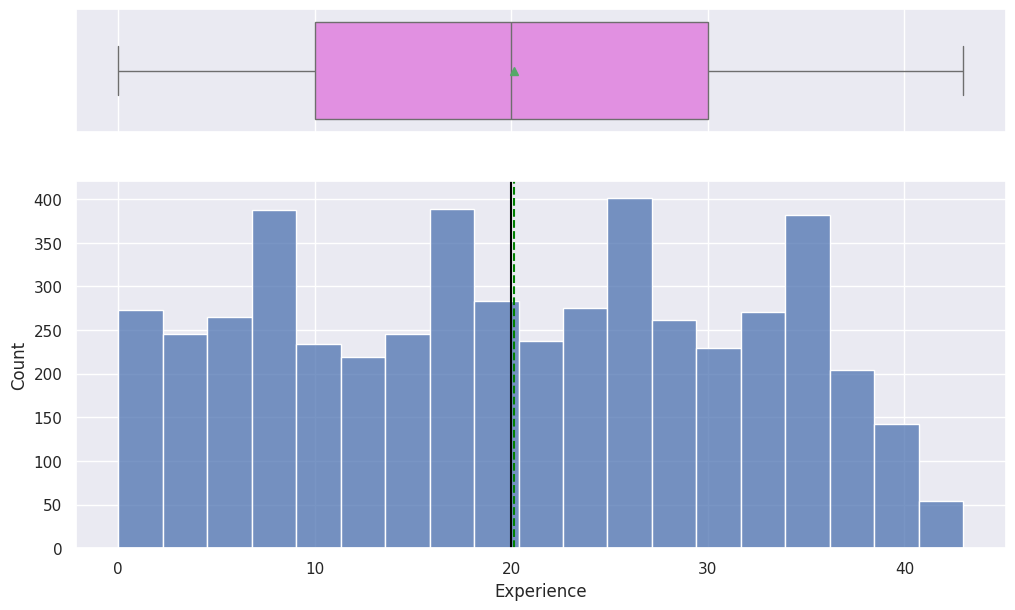

In [50]:
histogram_boxplot(data, "Experience") ## Complete the code to create histogram_boxplot for experience

In [ ]:
#Observations on Income

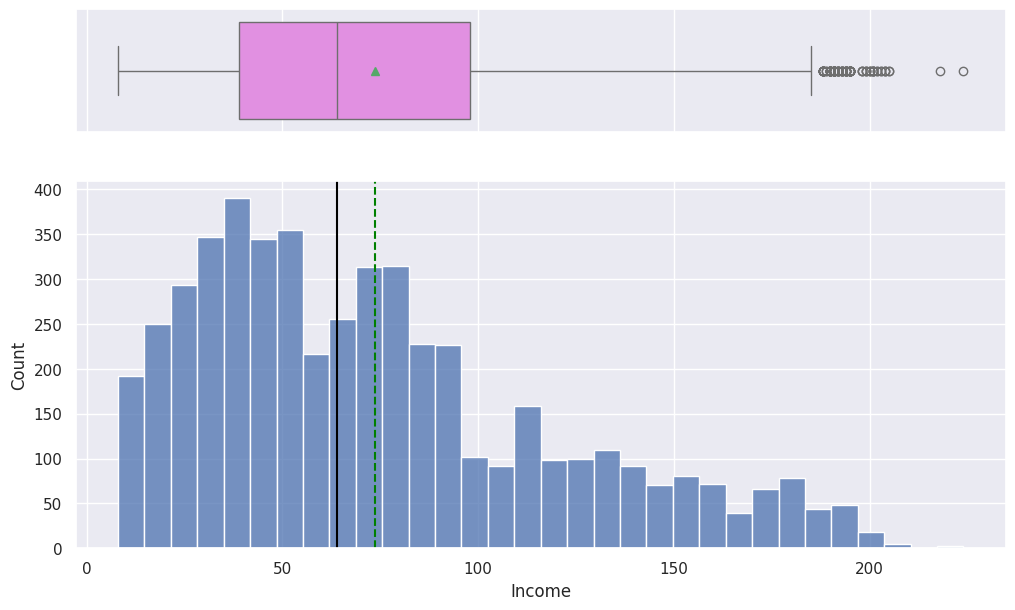

In [54]:
histogram_boxplot(data, "Income")  ## Complete the code to create histogram_boxplot for Income

In [ ]:
#Observations on CCAvg

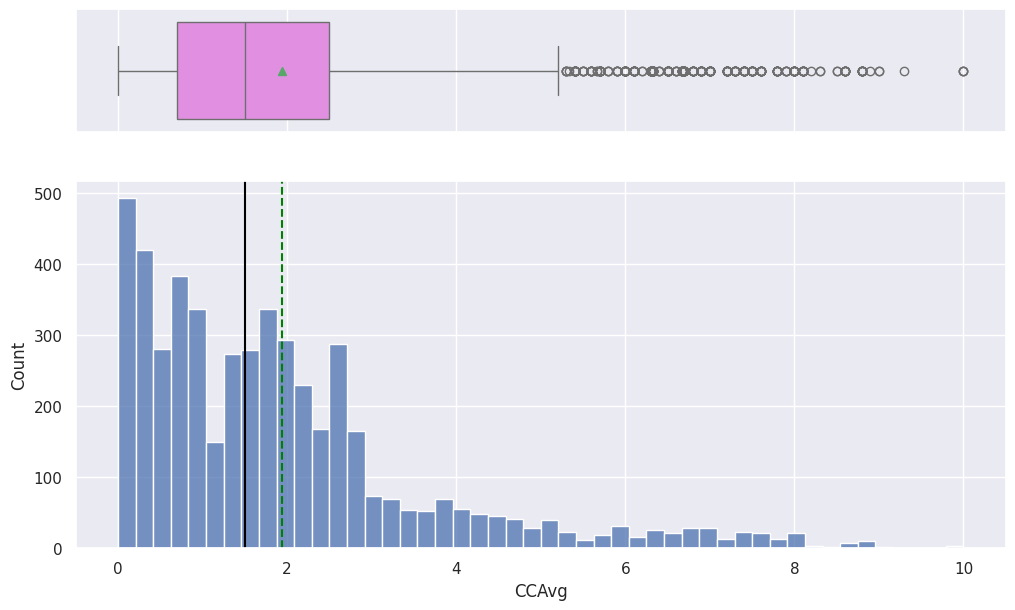

In [55]:
histogram_boxplot(data, "CCAvg")  ## Complete the code to create histogram_boxplot for CCAvg

In [ ]:
#Observations on Mortgage

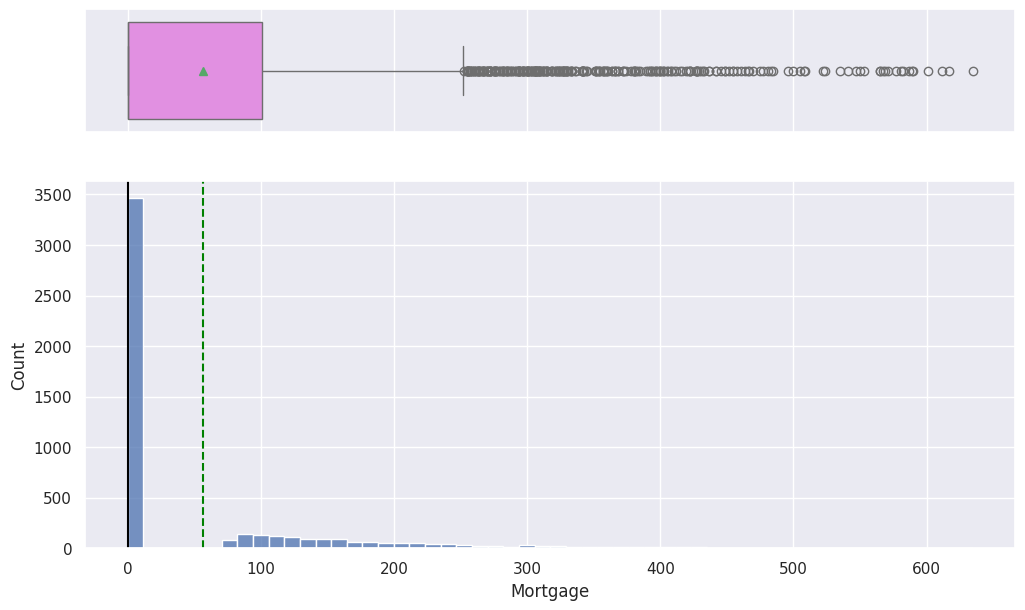

In [56]:
histogram_boxplot(data, "Mortgage")  ## Complete the code to create histogram_boxplot for Mortgage

In [ ]:
#Observations on Family

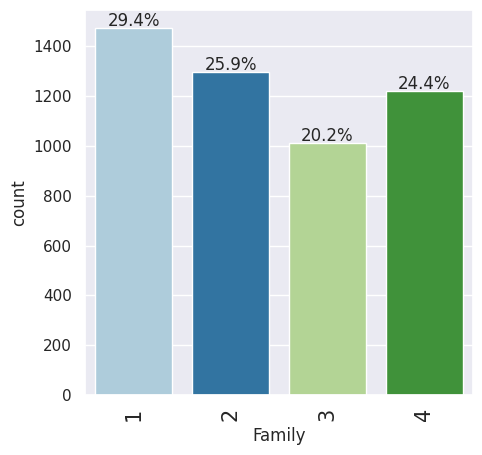

In [57]:
labeled_barplot(data, "Family", perc=True)

In [ ]:
#Observations on Education

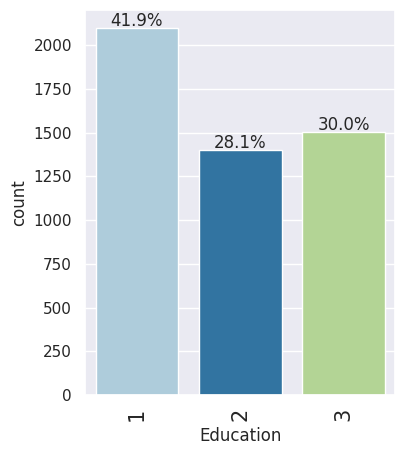

In [59]:
labeled_barplot(data, "Education", perc=True)   ## Complete the code to create labeled_barplot for Education

In [ ]:
#Observations on Securities_Account

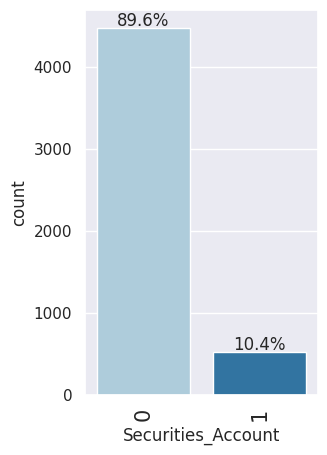

In [60]:
labeled_barplot(data, "Securities_Account", perc=True)   ## Complete the code to create labeled_barplot for Securities_Account

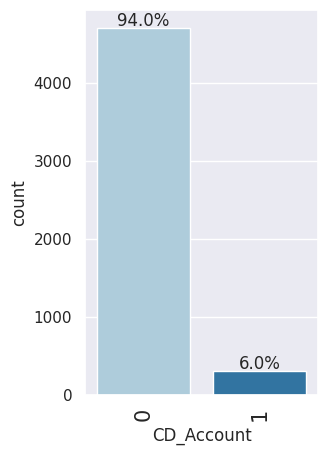

In [61]:
#Observations on CD_Account
labeled_barplot(data, "CD_Account", perc=True)   ## Complete the code to create labeled_barplot for CD_Account

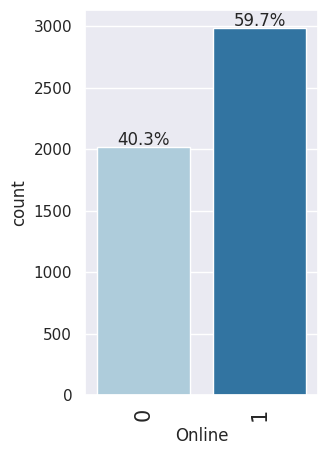

In [62]:
#Observations on Online
labeled_barplot(data, "Online", perc=True)   ## Complete the code to create labeled_barplot for Online

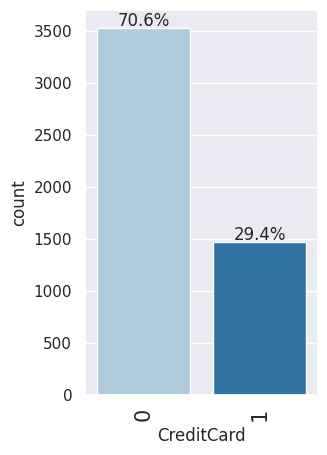

In [64]:
#Observation on CreditCard
labeled_barplot(data, "CreditCard", perc=True)   ## Complete the code to create labeled_barplot for CreditCard

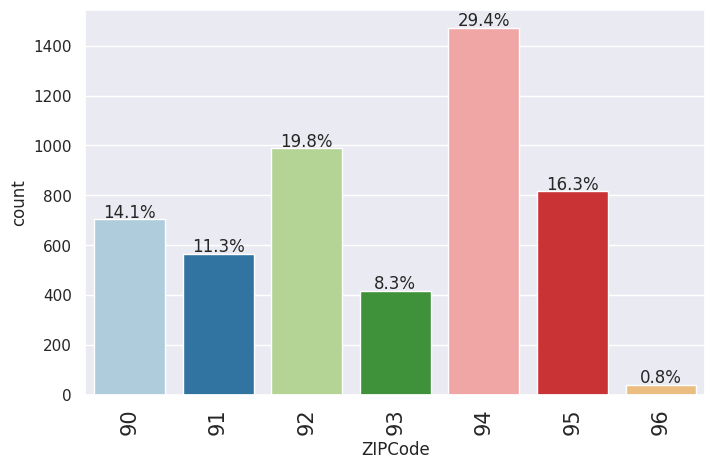

In [66]:
#Observation on ZIPCode
labeled_barplot(data, "ZIPCode", perc=True)   ## Complete the code to create labeled_barplot for ZIPCode

In [ ]:
#Bivariate Analysis

In [67]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [68]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

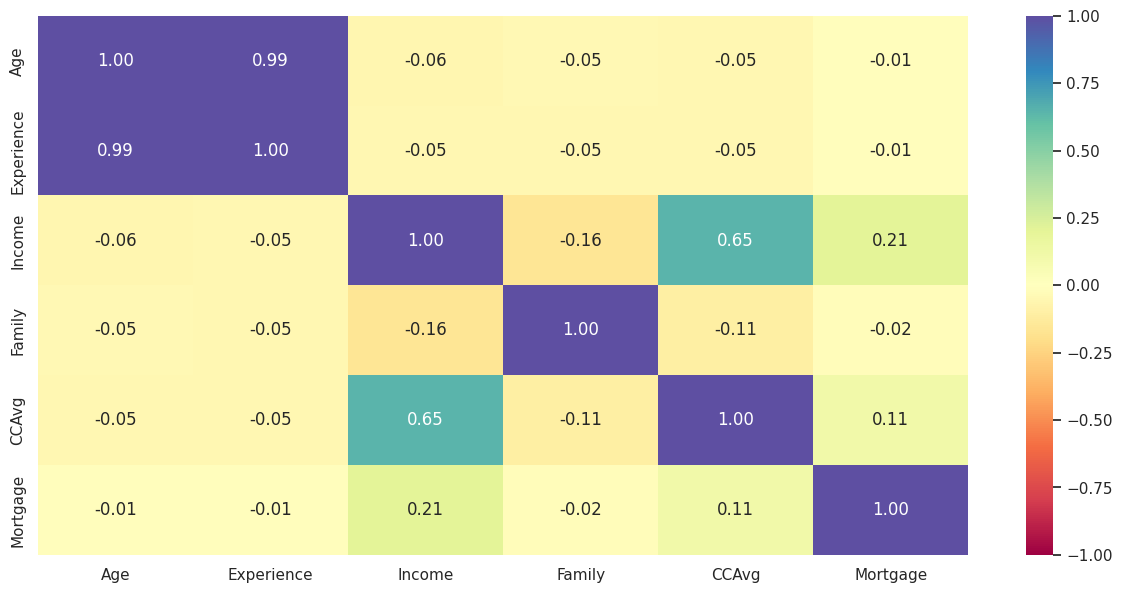

In [71]:
#Correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

In [ ]:
#Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


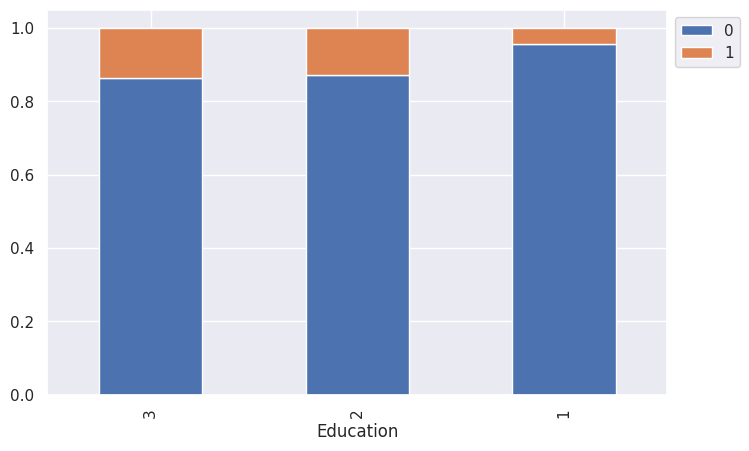

In [72]:
stacked_barplot(data, "Education", "Personal_Loan")

In [ ]:
#Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


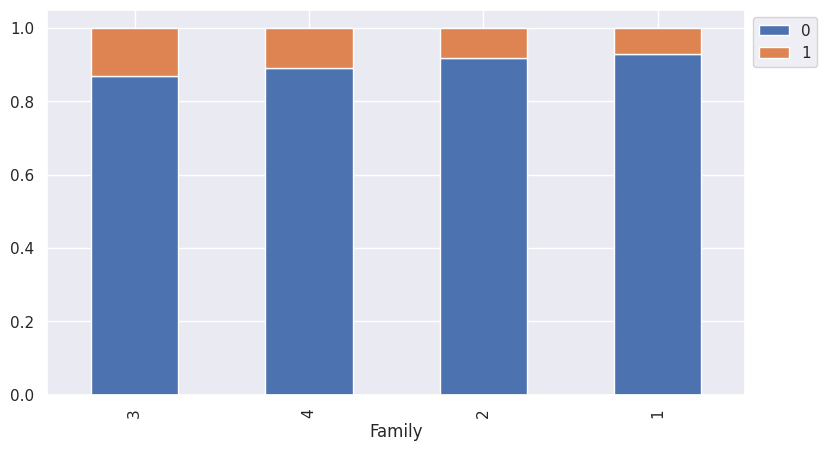

In [73]:
stacked_barplot(data, "Family", "Personal_Loan")  ## Complete the code to plot stacked barplot for Personal Loan and Family

In [ ]:
#Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


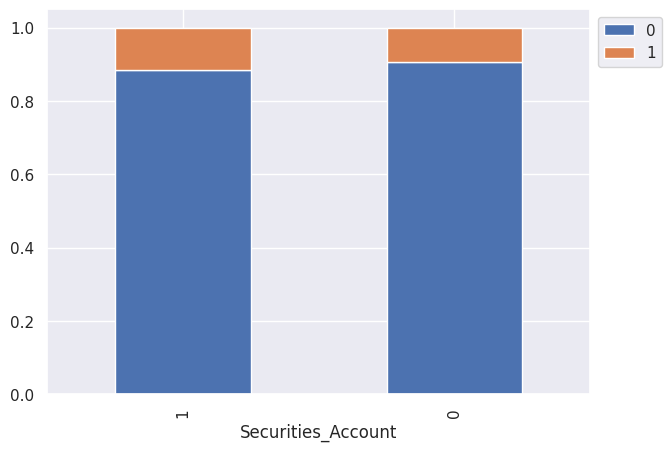

In [79]:
stacked_barplot(data, "Securities_Account", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Securities_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


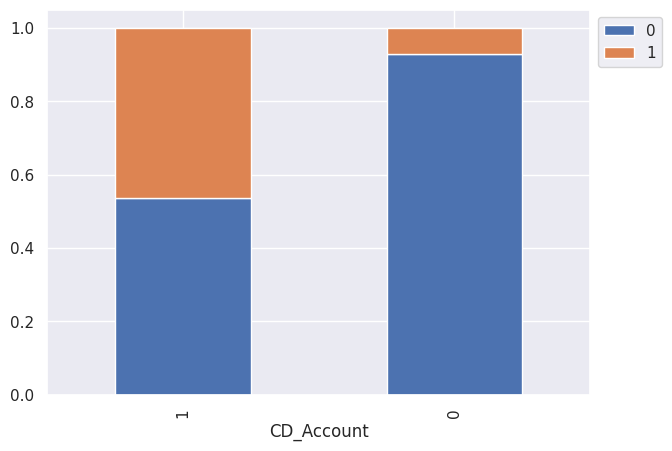

In [80]:
#Personal_Loan vs CD_Account
stacked_barplot(data, "CD_Account", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CD_Account

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


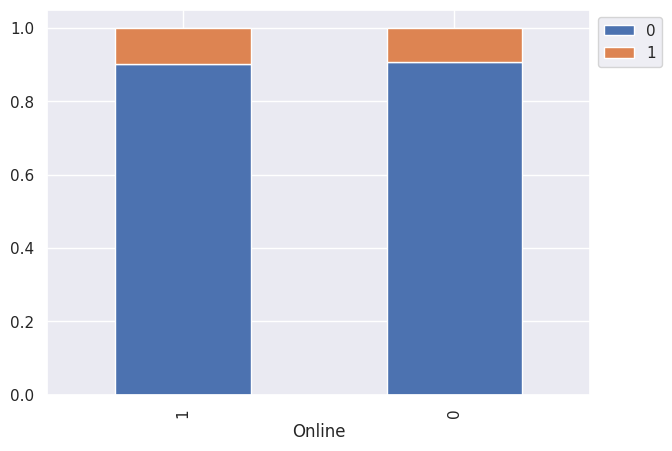

In [81]:
#Personal_Loan vs Online
stacked_barplot(data, "Online", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Online

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


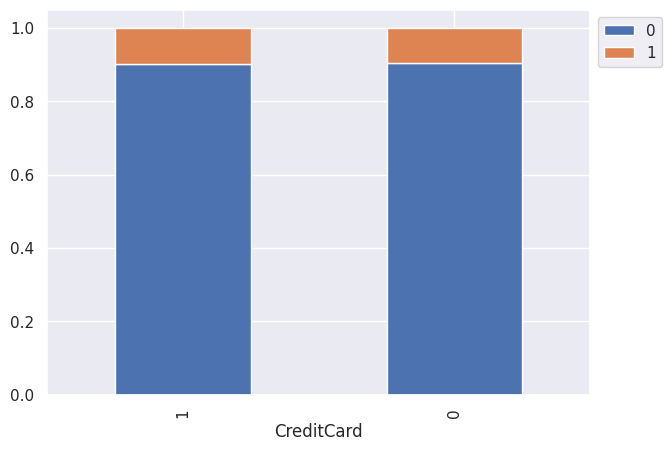

In [83]:
#Personal_Loan vs CreditCard
stacked_barplot(data, "CreditCard", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CreditCard

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


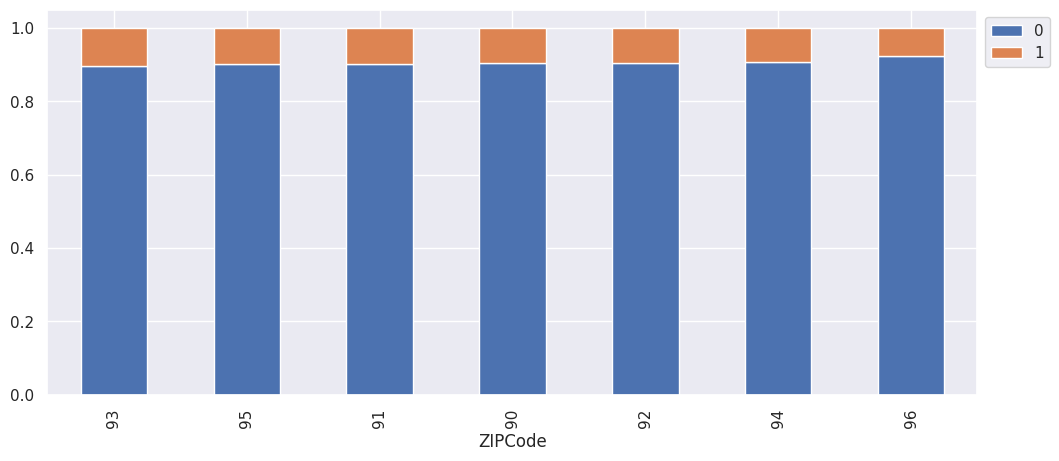

In [84]:
#Personal_Loan vs ZIPCode
stacked_barplot(data, "ZIPCode", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and ZIPCode


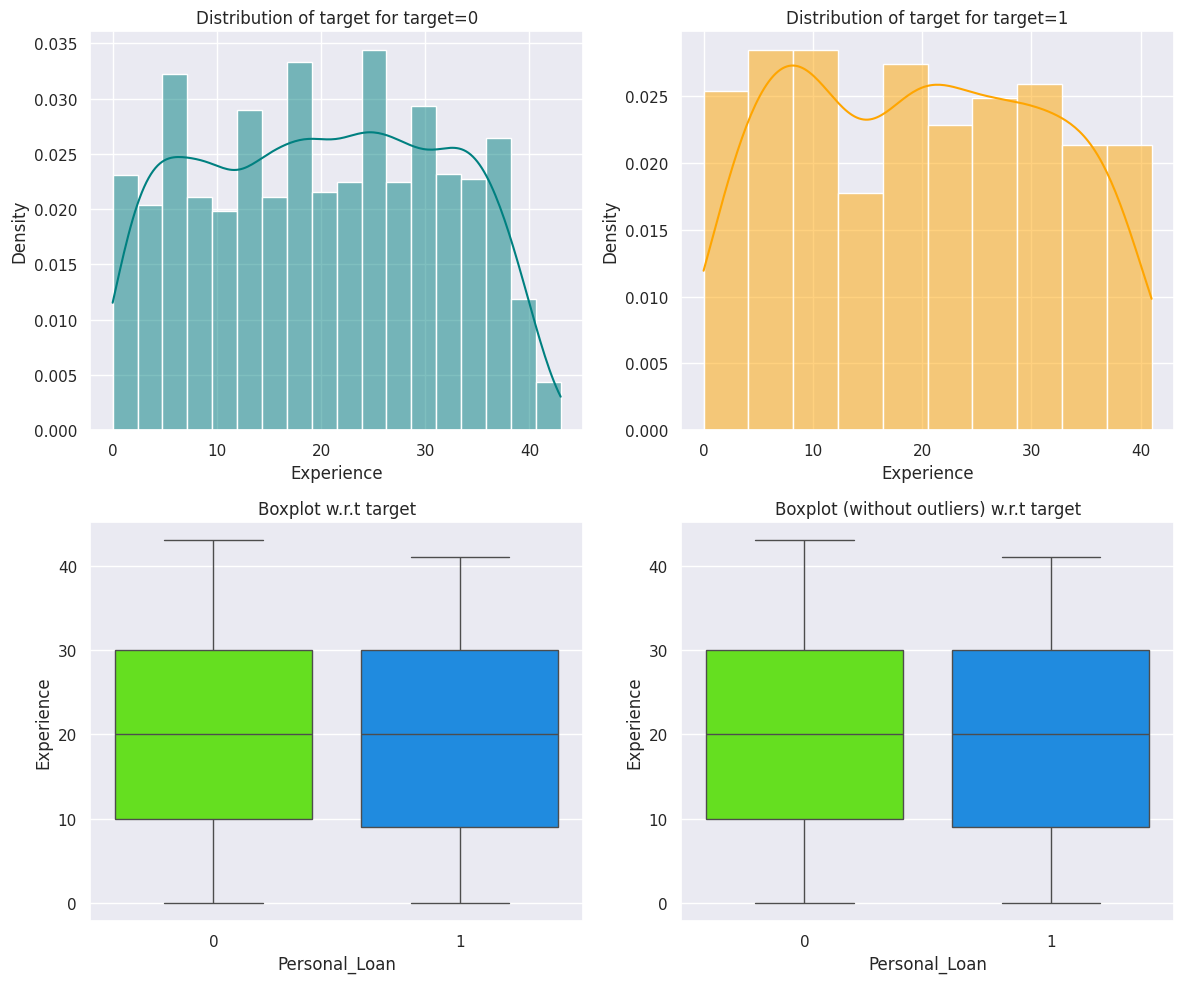

In [87]:
#Personal Loan vs Experience
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")## Complete the code to plot stacked barplot for Personal Loan and Experience

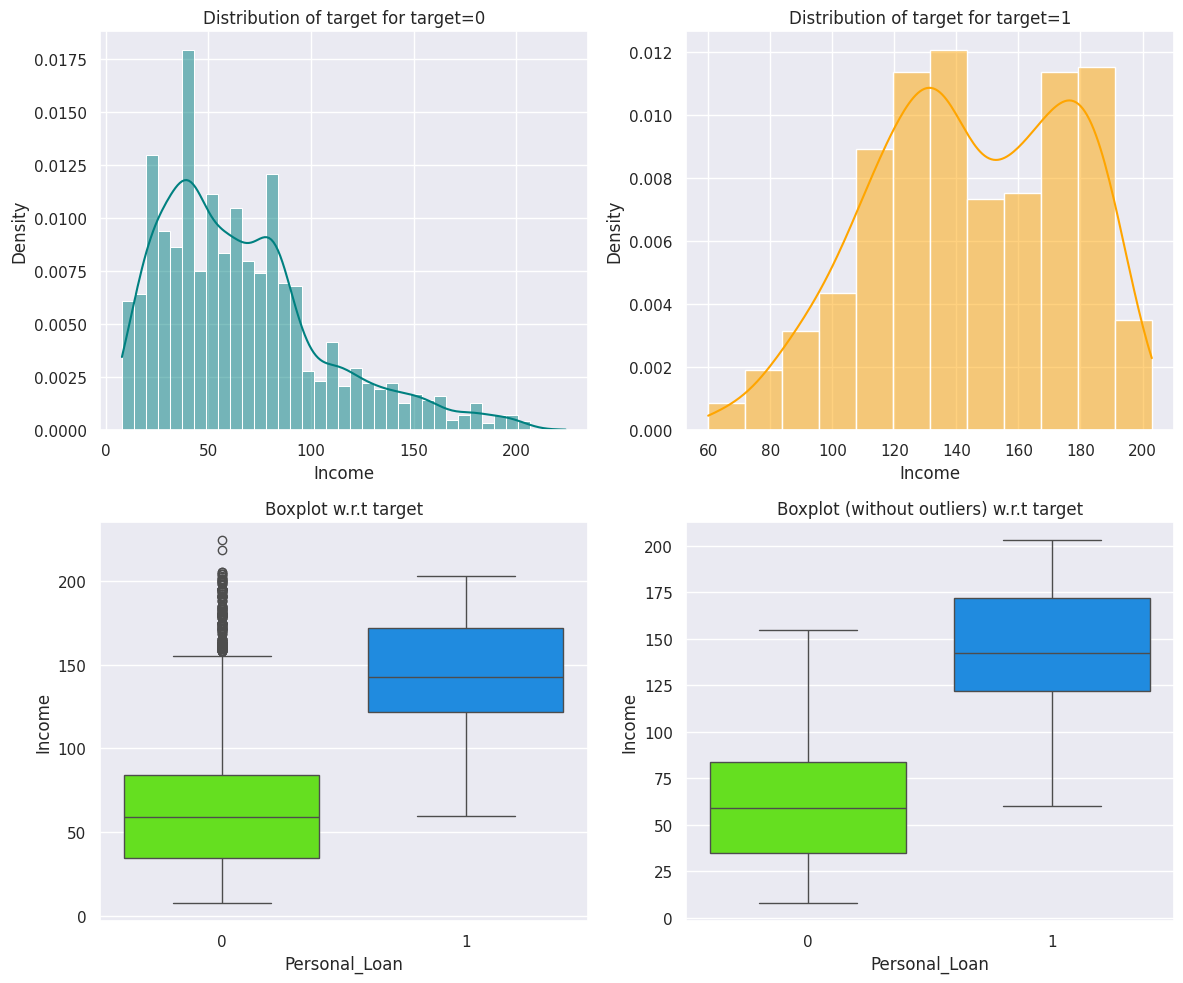

In [88]:
#Personal Loan vs Income
distribution_plot_wrt_target(data, "Income", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Income

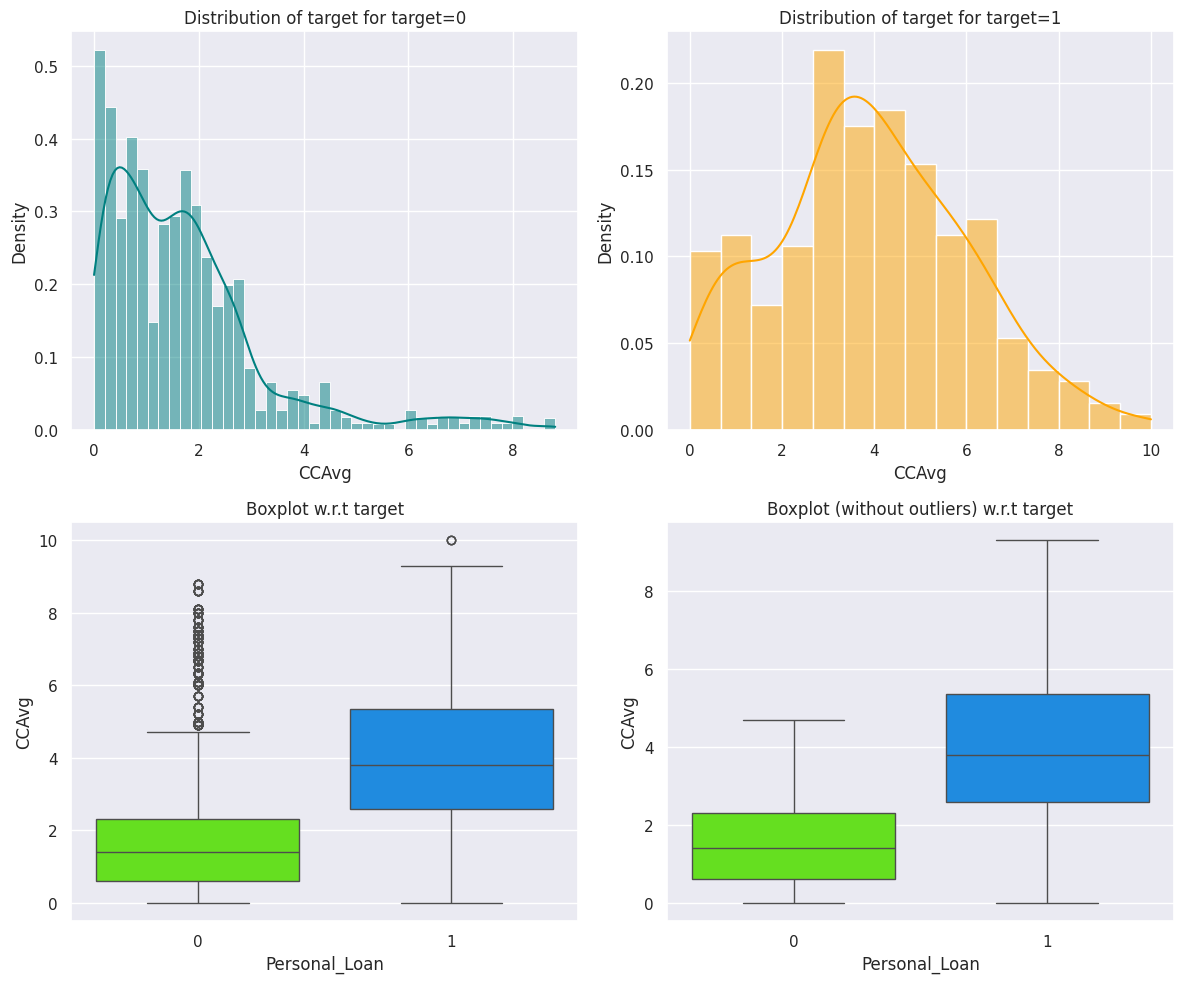

In [90]:
#Personal Loan vs CCAvg
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CCAvg

In [ ]:
#Outliners Detection

In [28]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [29]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
ID,0.00
Age,0.00
Experience,0.00
Income,1.92
ZIPCode,0.00
Family,0.00
CCAvg,6.48
Education,0.00
Mortgage,5.82
Personal_Loan,9.60


In [30]:
#Data Preparation for Modeling
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [31]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 478)
Shape of test set :  (1500, 478)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


In [ ]:
#Model Building

In [32]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [33]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#Decision Tree (sklearn default)

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

In [ ]:
#Checking model performance on training data

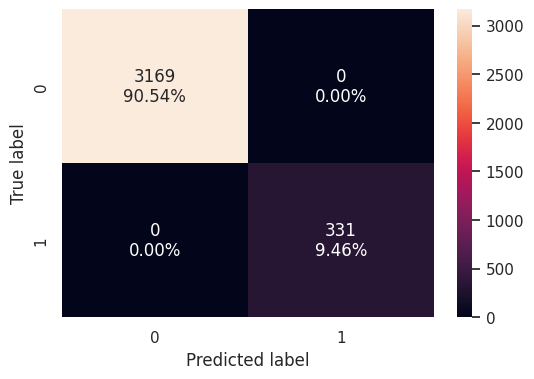

In [35]:
confusion_matrix_sklearn(model, X_train, y_train)

In [36]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [37]:
#Visualizing the Decision Tree

In [38]:
feature_names = list(X_train.columns)
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_90007', 'ZIPCode_90009', 'ZIPCode_90011', 'ZIPCode_90016', 'ZIPCode_90018', 'ZIPCode_90019', 'ZIPCode_90024', 'ZIPCode_90025', 'ZIPCode_90027', 'ZIPCode_90028', 'ZIPCode_90029', 'ZIPCode_90032', 'ZIPCode_90033', 'ZIPCode_90034', 'ZIPCode_90035', 'ZIPCode_90036', 'ZIPCode_90037', 'ZIPCode_90041', 'ZIPCode_90044', 'ZIPCode_90045', 'ZIPCode_90048', 'ZIPCode_90049', 'ZIPCode_90057', 'ZIPCode_90058', 'ZIPCode_90059', 'ZIPCode_90064', 'ZIPCode_90065', 'ZIPCode_90066', 'ZIPCode_90068', 'ZIPCode_90071', 'ZIPCode_90073', 'ZIPCode_90086', 'ZIPCode_90089', 'ZIPCode_90095', 'ZIPCode_90210', 'ZIPCode_90212', 'ZIPCode_90230', 'ZIPCode_90232', 'ZIPCode_90245', 'ZIPCode_90250', 'ZIPCode_90254', 'ZIPCode_90266', 'ZIPCode_90272', 'ZIPCode_90274', 'ZIPCode_90275', 'ZIPCode_90277', 'ZIPCode_90280', 'ZIPCode_90291', 'ZIPCode_90304', 'ZIPCode_90401', 'ZIPCode_90404', 'ZIPCode_90405', '

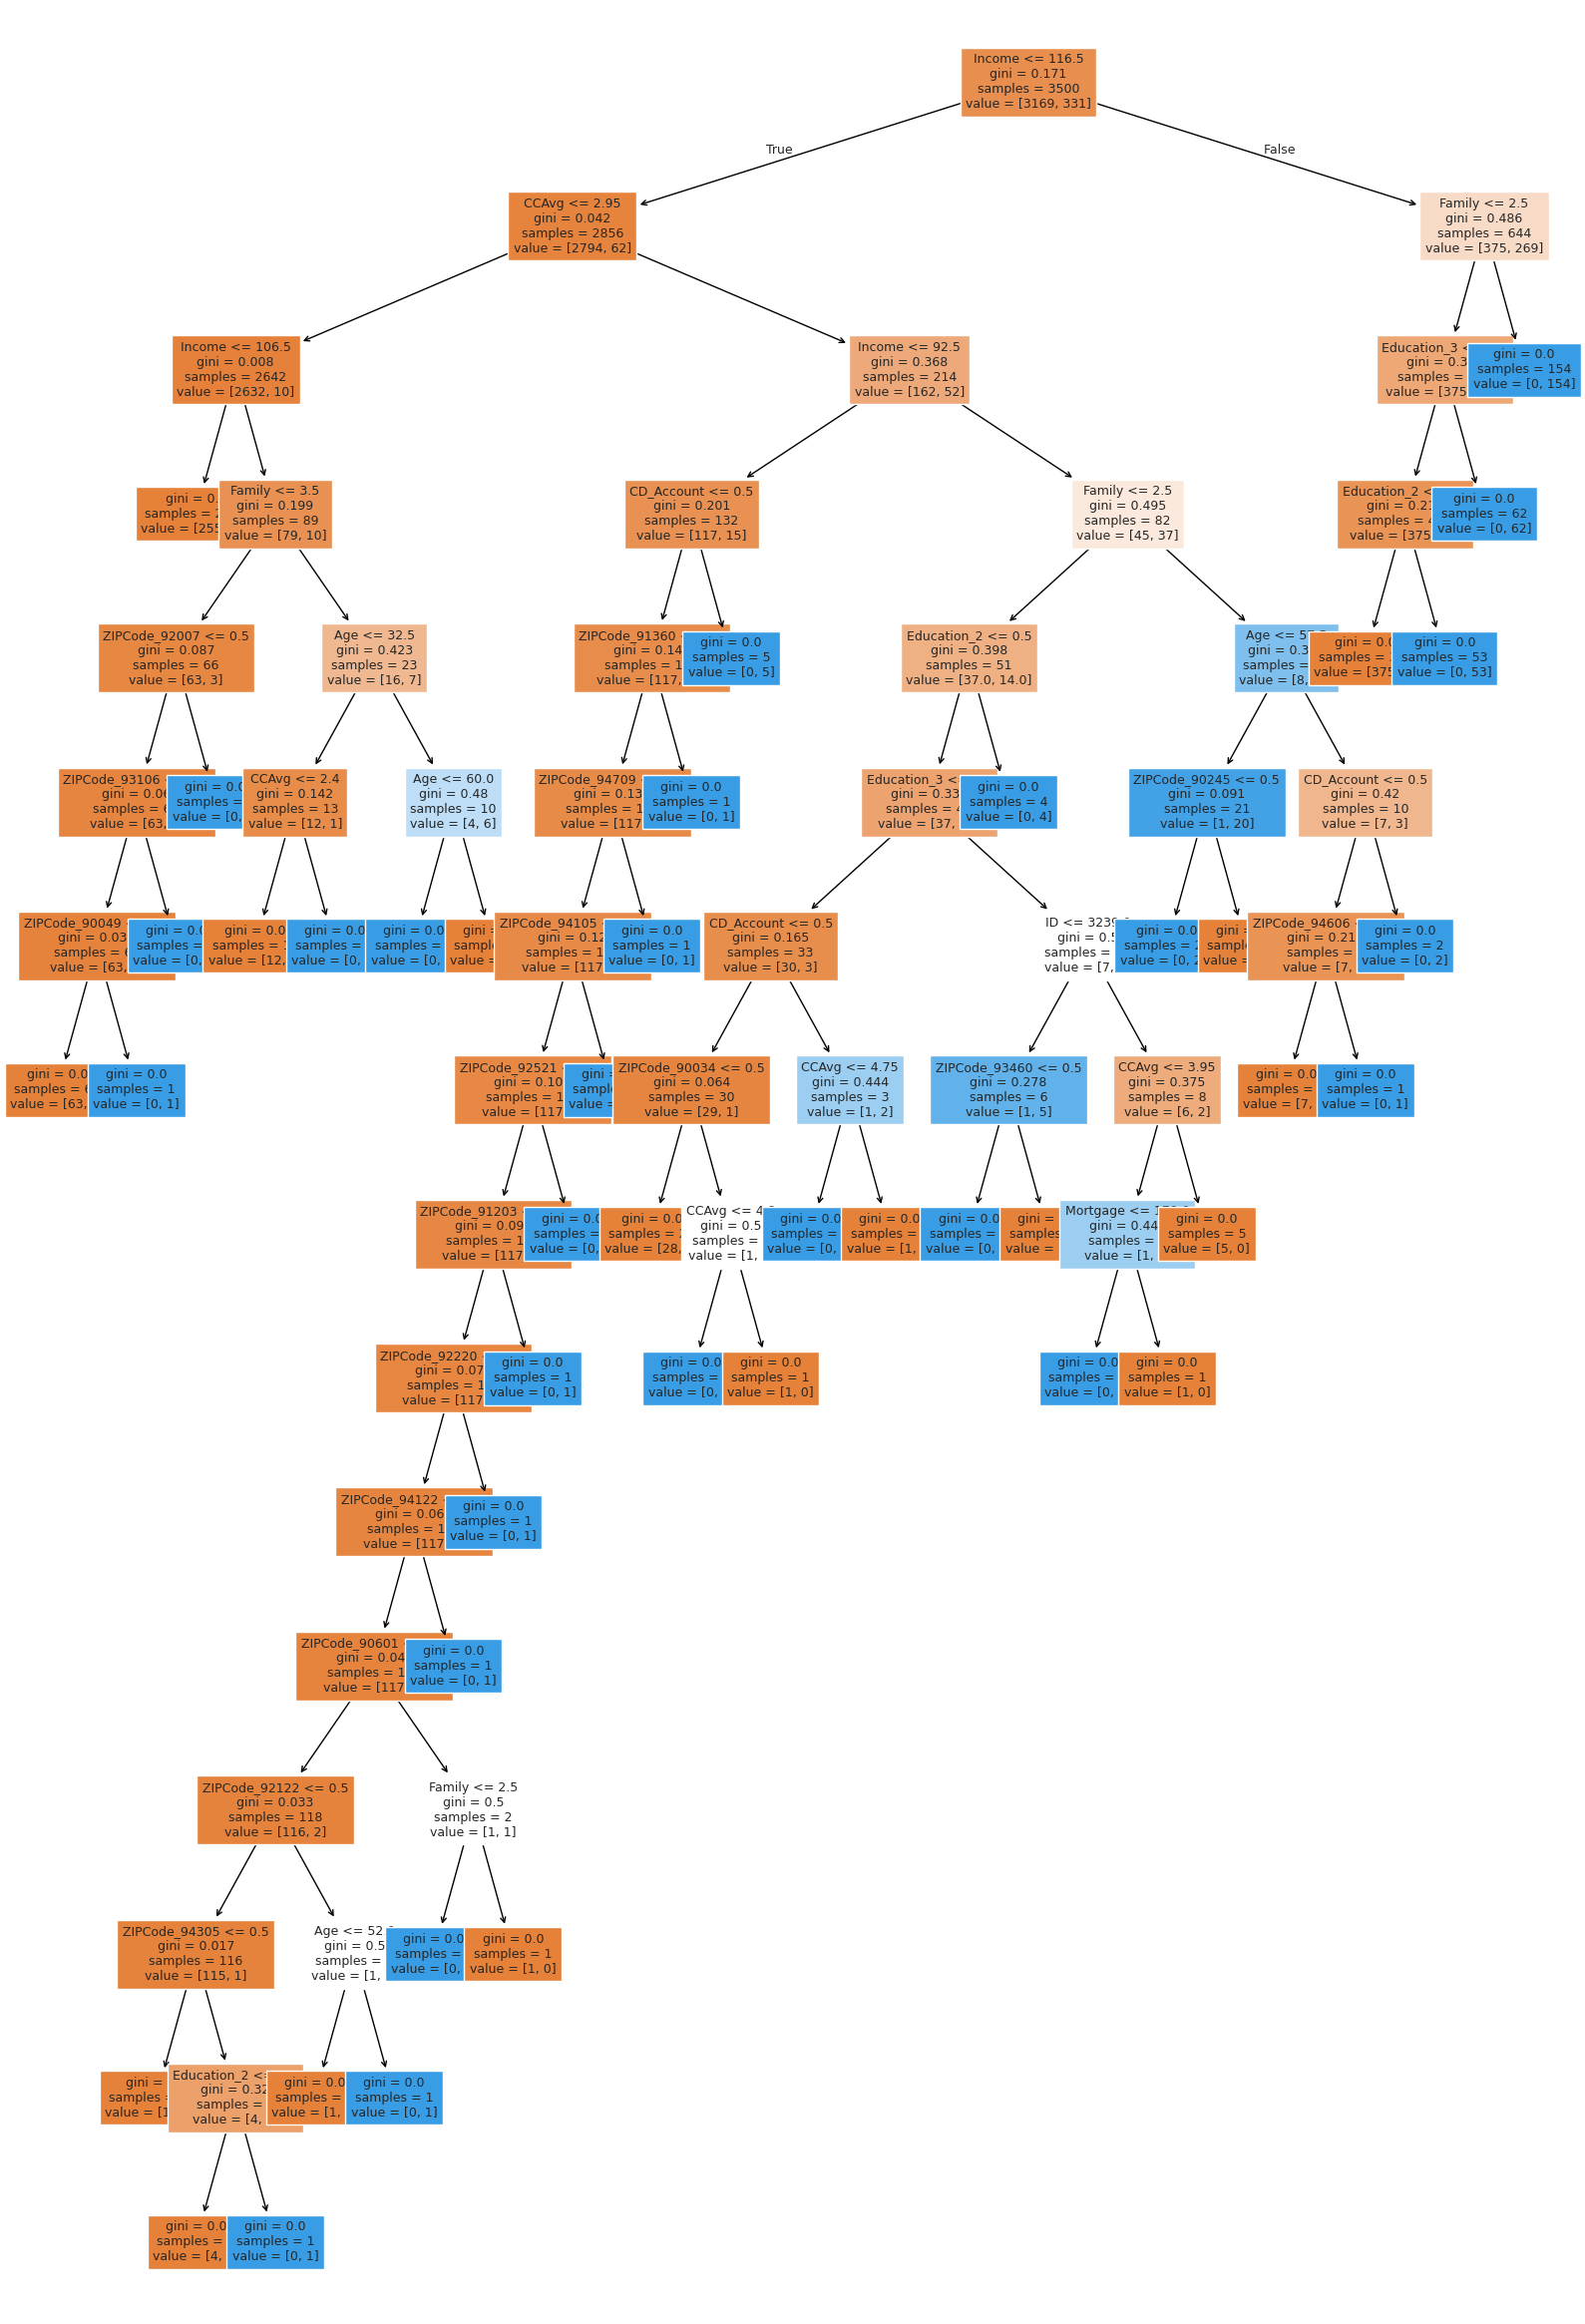

In [39]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [40]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.40
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |---

In [41]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income         0.297816
Family         0.248530
Education_2    0.165238
Education_3    0.144207
CCAvg          0.047550
...                 ...
ZIPCode_92110  0.000000
ZIPCode_92109  0.000000
ZIPCode_92106  0.000000
ZIPCode_92104  0.000000
ZIPCode_93009  0.000000

[478 rows x 1 columns]


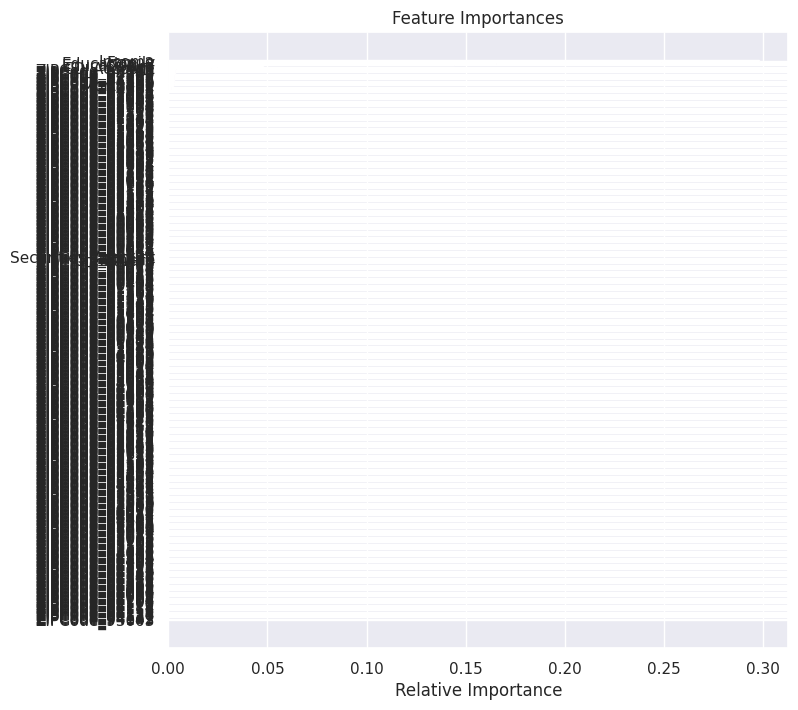

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
#Checking model performance on test data

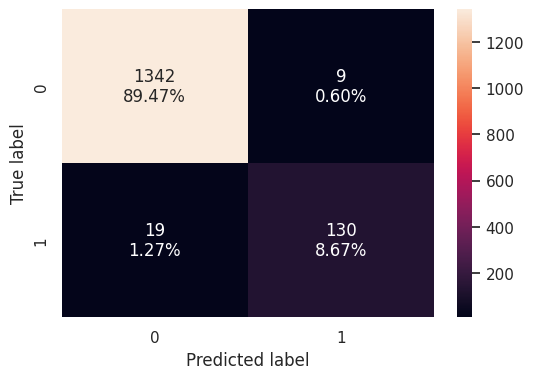

In [44]:
confusion_matrix_sklearn(model,X_test, y_test) ## Complete the code to create confusion matrix for test data

In [45]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.872483,0.935252,0.902778


In [ ]:
#Model Performance Improvement

In [49]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 50
Best test recall score: 0.8590604026845637


In [50]:
# Fit the best algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=50,
                       random_state=42)

In [ ]:
#Checking performance on training data

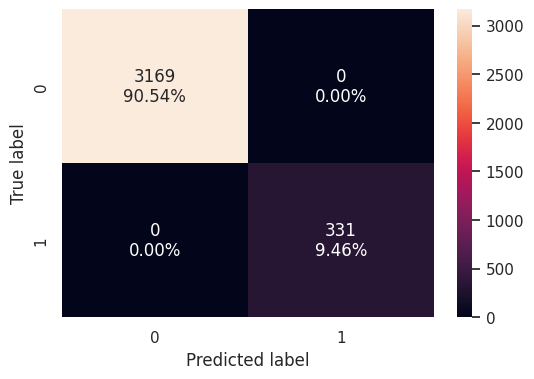

In [53]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [54]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
#Visualizing the Decision Tree

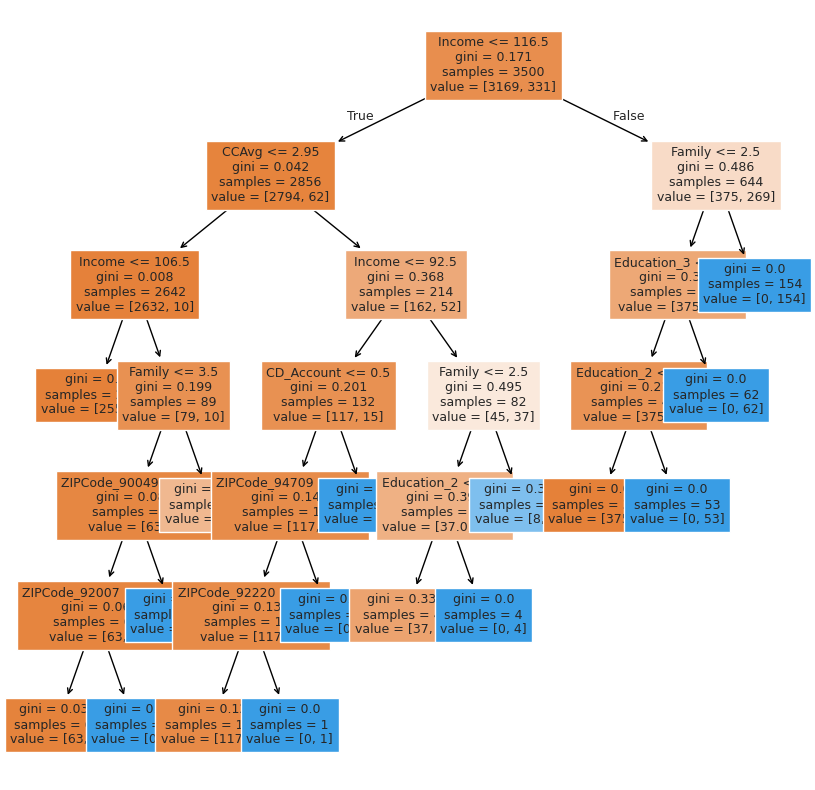

In [55]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [56]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |   |--- weights: [63.00, 1.00] class: 0
|   |   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- ZIPCode_94709 <= 0.50
|   |   |   |   |   |--- ZIPCode_92220 <= 0.50
|   |   |   |   |   |   |--- weights: [117.00, 8.00] class: 0
|   |   |   |   |   |--- ZIPCode_92220 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZI

In [57]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income         0.327483
Family         0.271453
Education_2    0.178763
Education_3    0.152536
CCAvg          0.041561
...                 ...
ZIPCode_92101  0.000000
ZIPCode_92096  0.000000
ZIPCode_92093  0.000000
ZIPCode_92084  0.000000
ZIPCode_93009  0.000000

[478 rows x 1 columns]


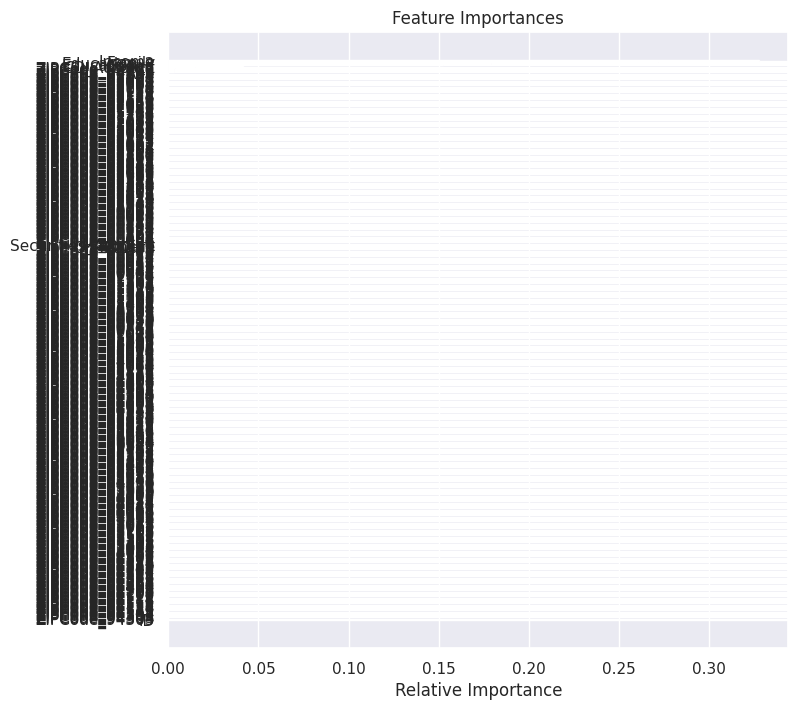

In [58]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

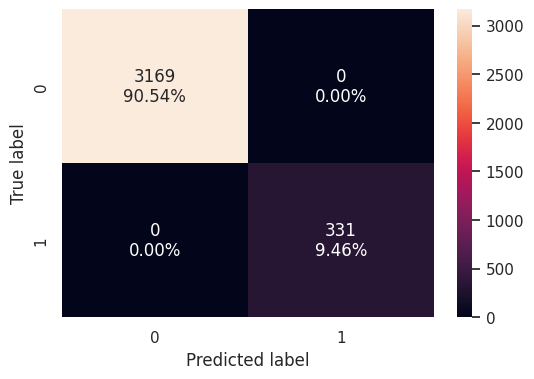

In [64]:
confusion_matrix_sklearn(model, X_train, y_train)  # Complete the code to get the confusion matrix on test datamodel

In [65]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
#Post-Pruning

In [66]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [67]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000276,0.000552
2,0.000279,0.002224
3,0.000381,0.002605
4,0.000381,0.002986
5,0.000476,0.003462
6,0.000476,0.003938
7,0.000500,0.004438
8,0.000513,0.008031
9,0.000527,0.008558


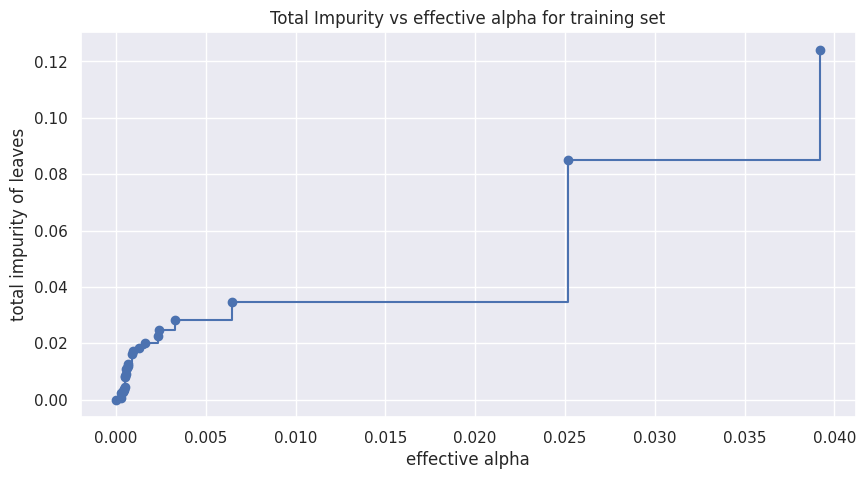

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
#Next, we train a decision tree using effective alphas.
#The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [70]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


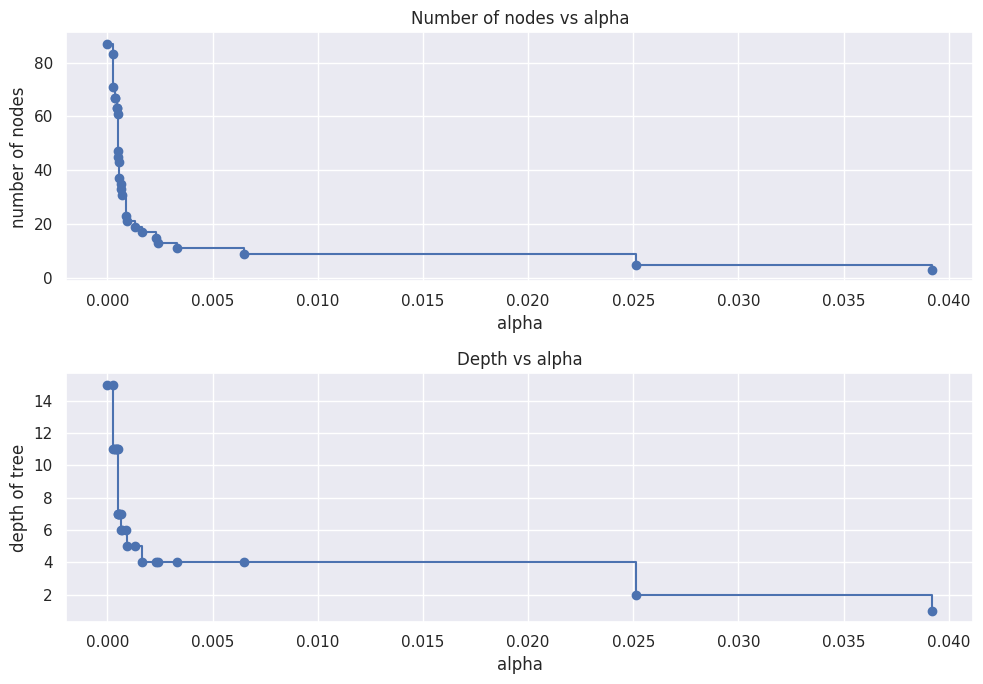

In [71]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
#Recall vs alpha for training and testing sets

In [72]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

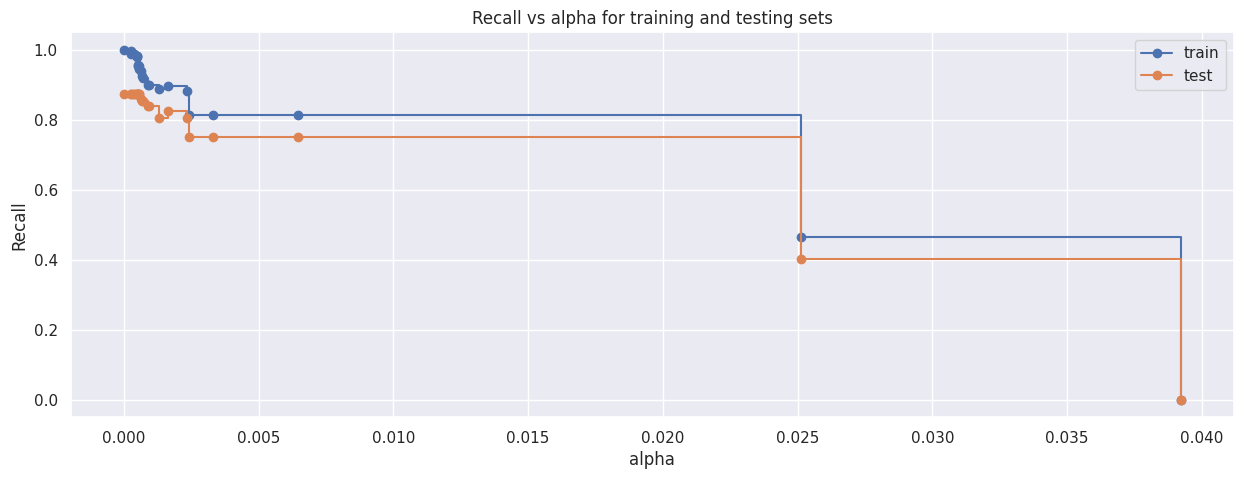

In [73]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [74]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [76]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.001, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

In [ ]:
#Checking performance on training data

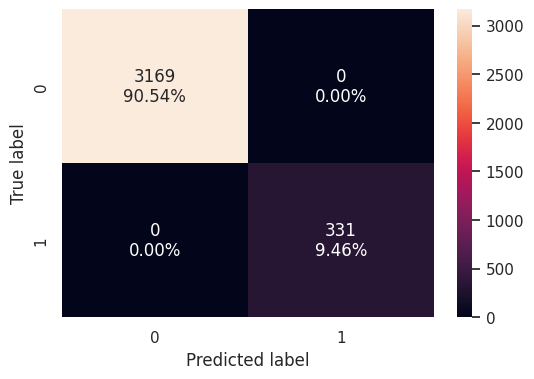

In [77]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [78]:
decision_tree_tune_post_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
#Visualizing the Decision Tree

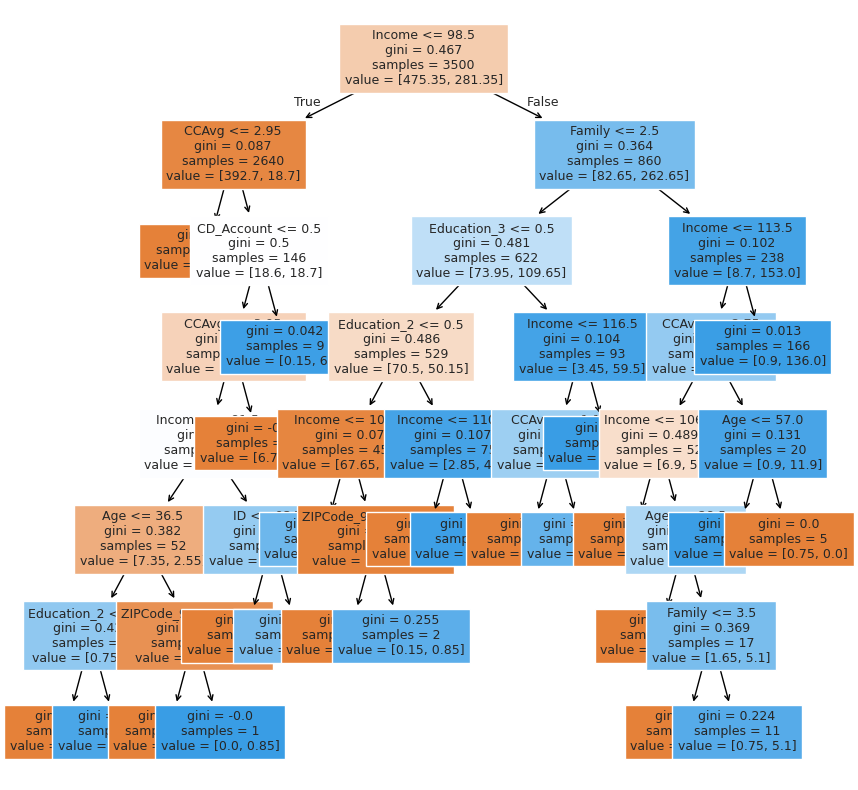

In [79]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

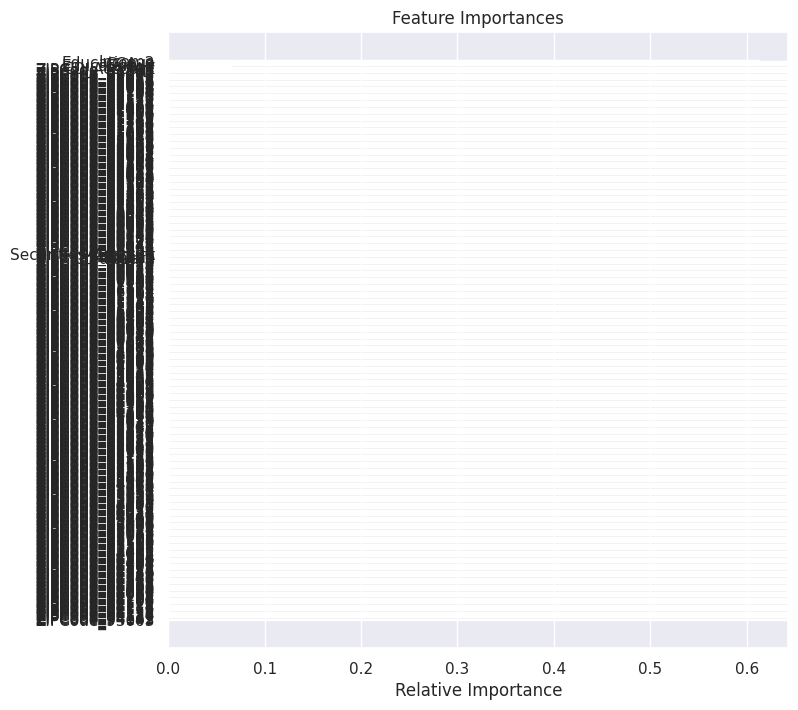

In [82]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [80]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))


|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91203 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.60, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91203 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- ID <= 934.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- ID >  934.50
|   |   |   |   |   |   |--- weights: [3.00, 9.35] class: 1
|   |   |   |--- CCAvg

In [81]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income         0.612620
Education_2    0.144570
CCAvg          0.073620
Education_3    0.068332
Family         0.065175
...                 ...
ZIPCode_92104  0.000000
ZIPCode_92103  0.000000
ZIPCode_92101  0.000000
ZIPCode_92096  0.000000
ZIPCode_93009  0.000000

[478 rows x 1 columns]


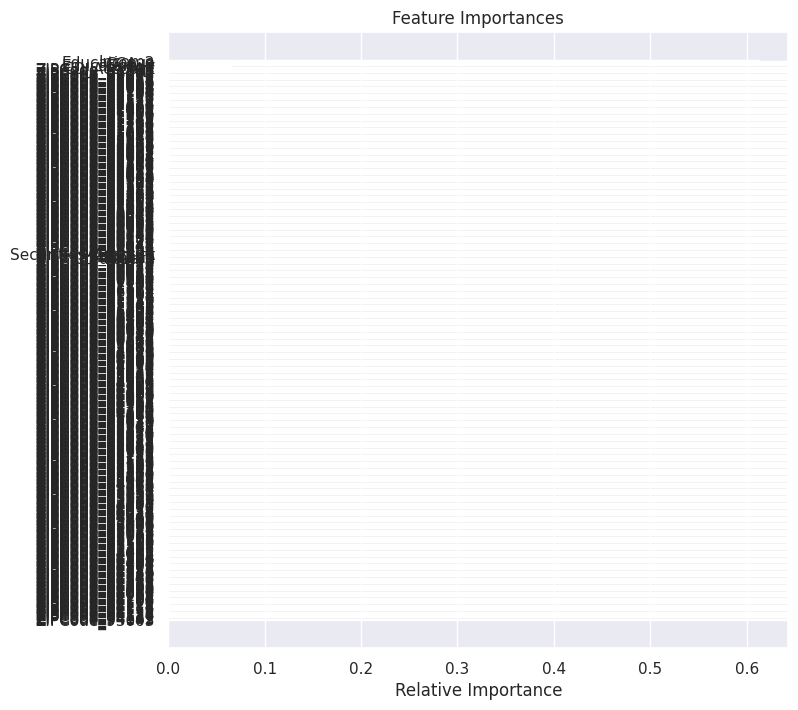

In [83]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
#Checking performance on test data

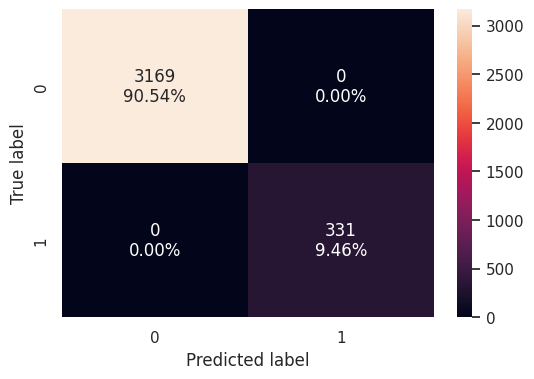

In [84]:
confusion_matrix_sklearn(model, X_train, y_train)  # Complete the code to get the confusion matrix on test data

In [85]:
decision_tree_tune_post_test = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
#Model Performance Comparison and Final Model Selection

In [86]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,1.0
Recall,1.0,1.0,1.0
Precision,1.0,1.0,1.0
F1,1.0,1.0,1.0


In [87]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df


Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,1.0,1.0
Recall,0.872483,1.0,1.0
Precision,0.935252,1.0,1.0
F1,0.902778,1.0,1.0
